In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df=pd.read_csv("Cricket.csv",encoding="latin")
df
#encrypted data to decode: encoding=latin, in industry client will give encoding code
#we have 
#Latin 1, latin, ISO-8859-1, UTF-8 or 16,ascii,

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [132]:
df.info()
# high score has * : thats why object dtype
#span : has - 
#player : string content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [133]:
str.split("Hello, hi",",") #jithe "," asel tithun split

['Hello', ' hi']

In [134]:
str.split("1988-2012","-")

['1988', '2012']

In [135]:
df["Span"].str.split("-")

0     [1989, 2012]
1     [2000, 2015]
2     [1995, 2012]
3     [1989, 2011]
4     [1998, 2015]
          ...     
74    [1975, 1991]
75    [2002, 2015]
76    [2001, 2011]
77    [1998, 2009]
78    [1996, 2011]
Name: Span, Length: 79, dtype: object

In [136]:
df["Span"].str.split("-",expand=True) #need both no in seperate column

,0,1
0,1989,2012
1,2000,2015
2,1995,2012
3,1989,2011
4,1998,2015
...,...,...
74,1975,1991
75,2002,2015
76,2001,2011
77,1998,2009


In [137]:
df[["start","end"]]=df["Span"].str.split("-",expand=True)

In [138]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [139]:
df["end"]=df["end"].astype(int)
df["start"]=df["start"].astype(int)

In [140]:
df["Exp"]=df["end"]-df["start"]

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     int32  
 14  end     79 non-null     int32  
 15  Exp     79 non-null     int32  
dtypes: float64(2), int32(3), int64(8), object(3)
memory usage: 9.1+ KB


In [142]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [143]:
df.drop(columns=["Span","start","end"],errors='ignore',inplace=True) 

In [144]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [145]:
#we have * in highest 
df["HS"].str.replace("*","")

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: HS, Length: 79, dtype: object

In [146]:
df["HS"]=df["HS"].str.replace("*","")
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [147]:
df["HS"]=df["HS"].astype(int)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 7.5+ KB


In [149]:
#checking null values in the data
df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
Exp       0
dtype: int64

In [150]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

In [151]:
df.duplicated().sum()

0

#outlier
in the given data we dont want to consider outliers
1. lack of data (datais too small)
2. this is a stats data (person can score 0 to higher so we can not consider)
3. 

**#Data Preprocessing**  
#**Standardization**: Standardization (also called Z-score normalization) is a technique to rescale numerical features
* bringing numbers on same level same scale
* some values are to large and some are so small
* like runs=18500 & some small=44.53 --> bring them into smaller range 
* we are just bringing them into smaller range...but
relation between them is same
* this called Z-score normalization

* formula: Z=(X-mu)/sigma

Why Do We Standardize?  
Because many machine learning algorithms (like K-Means) are distance-based, and differences in scale can badly affect the results.

For example:

Runs can be in thousands

Batting Average is around 30–50

Strike Rate might be around 70–100

Without standardization:

The algorithm thinks Runs is more important just because it has larger numbers — which is not true.

In [155]:
from sklearn.preprocessing import StandardScaler

* so before going further : machine can not read object column(player) but want that for next process
* so we make copy of data and delete player column
* making a copy of original data so that this copied data can be passed to droping the players columns


In [157]:
new_df=df.copy()

In [158]:
new_df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [159]:
new_df.drop(columns=["Player"],inplace=True)

In [160]:
new_df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [161]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     79 non-null     int64  
 1   Inns    79 non-null     int64  
 2   NO      79 non-null     int64  
 3   Runs    79 non-null     int64  
 4   HS      79 non-null     int32  
 5   Ave     79 non-null     float64
 6   BF      79 non-null     int64  
 7   SR      79 non-null     float64
 8   100     79 non-null     int64  
 9   50      79 non-null     int64  
 10  0       79 non-null     int64  
 11  Exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 6.9 KB


In [162]:
sc=StandardScaler()  #sc is an object here oops

In [163]:
scaled_df=sc.fit_transform(new_df)
scaled_df
#scaler.fit(marks)         # Learns mean and std from marks   
#standardized = scaler.transform(marks)  # Uses learned mean/std to transform

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

What is fit_transform()?  
fit_transform() is a method provided by Scikit-learn that is used to both learn the   transformation parameters (like mean, std, min, max, etc.) and apply the transformation in  one step.


example:  
Imagine fit() as measuring a shirt size  
and transform() as stitching the shirts based on the measured size.

* 
scaler.fit(marks)         # Learns mean and std from mark   
* 
standardized = scaler.transform(marks)  # Uses learned mean/std to transfor

In ML Pipeline:  
- Use fit_transform() on training data

- Use only transform() on test data, using same scaler objectm


# Model Implementation

In [166]:
from sklearn.cluster import KMeans

* ELBOw curve to see the optimal number of cluster
* no. of cluters vs SSD values
* SSD/WCSS/Intertia : some squared distances
* WCSS : within the cluster sum of squared distances
* distance of every datapoint from centroid and mean/avg of sum squred distances
* why squared: to handled negative values

* large SSD --> means bigger cluster
* small SSD --> means smaller cluster

* so lets find out what type of ssd we will getting?


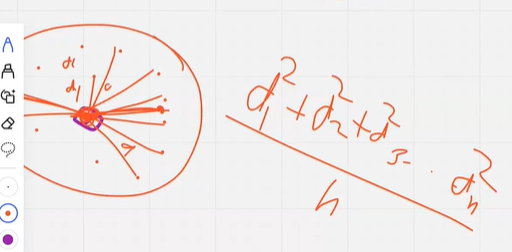

In [237]:
K_clusters=[2,3,4,5,6,7] #recommended go with less groups of clusters
#is it make sense : we create 79 gorup for 79 player : NO
#why not one? : that means entire data means one cluster : does not make sense
ssd=[] #want to return ssd value
for k in K_clusters:
    model=KMeans(n_clusters=k, max_iter=150, random_state=34)
    model.fit(scaled_df)
    ssd.append(model.inertia_) #inertia is nothing just paramenter

C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

In [170]:
K_clusters

[2, 3, 4, 5, 6, 7]

In [239]:
ssd

[645.4961128404274,
 562.5291860836356,
 487.56774909238663,
 422.8234764823884,
 395.4565184521792,
 388.1657944270887]

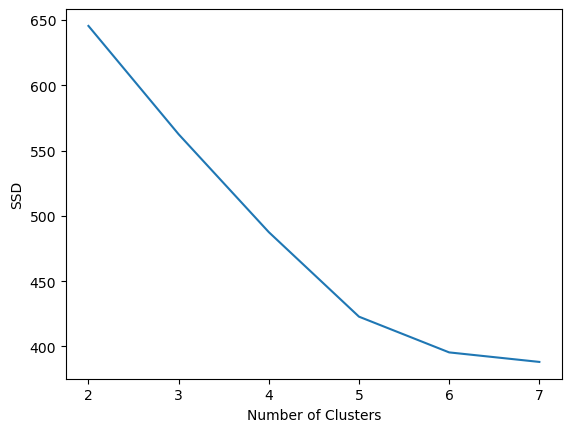

In [241]:
plt.plot(K_clusters,ssd) 
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()

In [ ]:
found bend/elbow at 3 and 5 but we choose 3 bcoz less clusters effeient

In [243]:
644.829826892706-556.9002082798365 #2nd to 3rd cluster shift

87.92961861286949

In [245]:
556.9002082798365-475.5040050339033 #3nd to 4rd 

81.39620324593324

In [247]:
475.5040050339033-432.06017005959353 #4nd to 5rd   #we can go with 5
#less number= most preferable

43.443834974309766

In [249]:
432.06017005959353-383.6909151427607 #5nd to 6rd 

48.36925491683286

In [ ]:
# final model implementaiton with 5 clusters

In [258]:
K_Model=KMeans(n_clusters=3, max_iter=150, random_state=2)
K_Model.fit(scaled_df)

C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=150, n_clusters=3, random_state=2)

In [260]:
K_Model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2])

In [262]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [266]:
df["ClusterID"]=K_Model.labels_ 

In [268]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,0
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,0
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,0


In [270]:
df[df["ClusterID"]==0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,0
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,0
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,0
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,0
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0
39,G Kirsten (SA),185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,0
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0
49,ML Hayden (AUS/ICC),161,155,15,6133,181,43.80,7767,78.96,10,36,9,15,0


In [272]:
df[df["ClusterID"]==1]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,1
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,1
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1


In [274]:
df[df["ClusterID"]==2]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,2
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,2
20,Yuvraj Singh (Asia/INDIA),304,278,40,8701,150,36.55,9924,87.67,14,52,18,17,2
22,MS Atapattu (SL),268,259,32,8529,132,37.57,12594,67.72,11,59,13,17,2
23,ME Waugh (AUS),244,236,20,8500,173,39.35,11053,76.90,18,50,16,14,2
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,2
26,HH Gibbs (SA),248,240,16,8094,175,36.13,9721,83.26,21,37,22,14,2
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124,23.57,6892,117.00,6,39,30,19,2
28,SP Fleming (ICC/NZ),280,269,21,8037,134,32.40,11242,71.49,8,49,17,13,2
30,SR Waugh (AUS),325,288,58,7569,120,32.90,9971,75.91,3,45,15,16,2
